# Import Dataset from Kaggle For Colab

I Use Colab pro because Google Colab pro provide more computitional resulrses like fast GPU specially in Colab pro. And to handle my large dataset like "skin-cancer-mnist-ham10000" Colab pro best option for me to exucte my code.
After compeleting my code i saved this on kaggle to access at any time

In [1]:
#we import dataset from kaggle that's why we install the kaggle in colab 
!pip install kaggle

In [2]:
#Set up Kaggle API by moving kaggle.json to .kaggle and setting file permissions.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Download the dataset from kaggle using dataset name
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000

License(s): CC-BY-NC-SA-4.0

skin-cancer-mnist-ham10000.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
#unzip the dataset file
!unzip skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.

  inflating: ham10000_images_part_2/ISIC_0029325.jpg  

  inflating: ham10000_images_part_2/ISIC_0029326.jpg  

  inflating: ham10000_images_part_2/ISIC_0029327.jpg  

  inflating: ham10000_images_part_2/ISIC_0029328.jpg  

  inflating: ham10000_images_part_2/ISIC_0029329.jpg  

  inflating: ham10000_images_part_2/ISIC_0029330.jpg  

  inflating: ham10000_images_part_2/ISIC_0029331.jpg  

  inflating: ham10000_images_part_2/ISIC_0029332.jpg  

  inflating: ham10000_images_part_2/ISIC_0029333.jpg  

  inflating: ham10000_images_part_2/ISIC_0029334.jpg  

  inflating: ham10000_images_part_2/ISIC_0029335.jpg  

  inflating: ham10000_images_part_2/ISIC_0029336.jpg  

  inflating: ham10000_images_part_2/ISIC_0029337.jpg  

  inflating: ham10000_images_part_2/ISIC_0029338.jpg  

  inflating: ham10000_images_part_2/ISIC_0029339.jpg  

  inflating: ham10000_images_part_2/ISIC_0029340.jpg  

  inflating: ham10000_images_part_2/ISIC_0029341.jpg

# Import Libararies

In [6]:
# Import libraries for data preprocessing and model building
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Import evaluation metrics and handling class imbalance
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler  # Ensure this is installed

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Import TensorFlow and Keras components for model architecture and training
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, DenseNet121, VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models, regularizers
import keras

# Dataset Load

In [7]:
# Define the file path and load the dataset into a DataFrame
FilePath = "/content/hmnist_28_28_RGB.csv"
dataSet = pd.read_csv(FilePath)

# Extract the labels from the dataset and drop the label column from the feature set
Label = dataSet["label"]
Data = dataSet.drop(columns=["label"])

# Class Distribution Plot

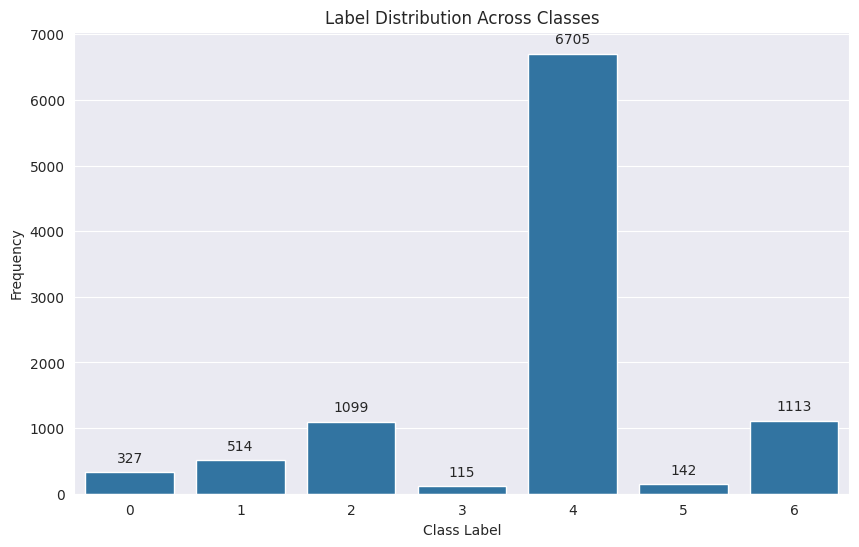

In [11]:
# Plot the distribution of labels with specified figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Create a count plot of the label distribution
ax = sns.countplot(x=Label)
plt.title("Label Distribution Across Classes")
plt.xlabel("Class Label")
plt.ylabel("Frequency")

# Annotate each bar with its count value for clarity
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Balance the Classes

In [9]:
# Apply RandomOverSampler to balance the dataset
oversample = RandomOverSampler()
Data, Label = oversample.fit_resample(Data, Label)

# Reshape the oversampled data to the specified dimensions
Data = np.array(Data).reshape(-1, 28, 28, 3)
print('Shape of Data :', Data.shape)

Shape of Data : (46935, 28, 28, 3)


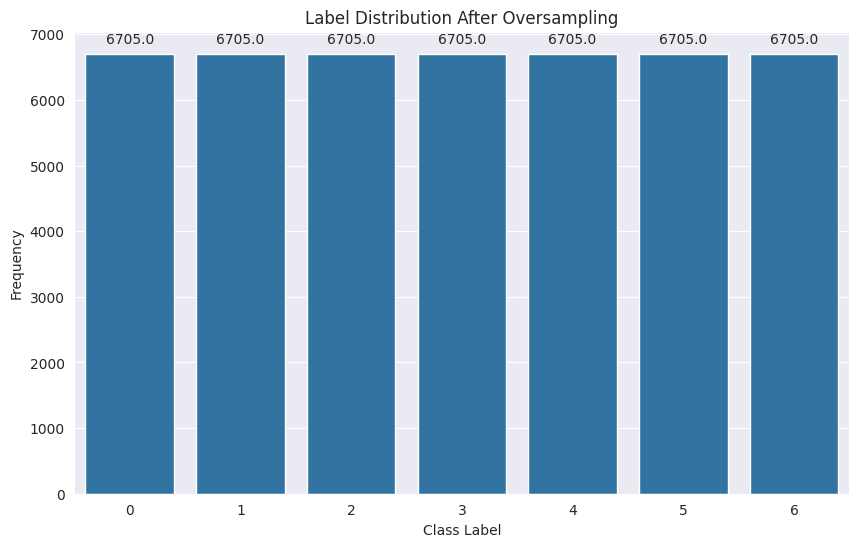

In [10]:
# Plot the distribution of labels after oversampling
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.countplot(x=Label)
plt.title("Label Distribution After Oversampling")
plt.xlabel("Class Label")
plt.ylabel("Frequency")

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [11]:
# Define class labels with their descriptions
classes = {4: ('nv', 'melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2: ('bkl', 'benign keratosis-like lesions'),
           1: ('bcc', 'basal cell carcinoma'),
           5: ('vasc', 'pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

# Convert Label to a numpy array
Label = np.array(Label)
Label

array([2, 2, 2, ..., 6, 6, 6])

# Spliting the Dataset

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=0.20, random_state=49)

# Further split the test set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=49)

# Print the shapes of datasets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (37548, 28, 28, 3)

y_train shape: (37548,)

X_val shape: (4693, 28, 28, 3)

y_val shape: (4693,)

X_test shape: (4694, 28, 28, 3)

y_test shape: (4694,)


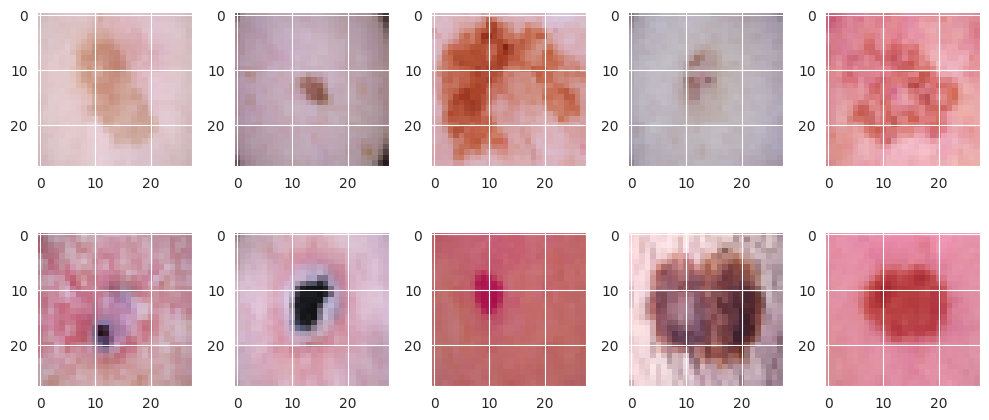

In [17]:
# Create a grid of subplots for displaying images
f, ax = plt.subplots(2, 5)
f.set_size_inches(10, 5)

# Initialize index for accessing images
k = 0

# Loop through grid to display images
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(X_train[k].reshape(28, 28, 3))  # Display image in subplot
        k += 1  # Move to the next image

# Adjust layout to prevent overlap
plt.tight_layout()


# One-hot encode the labels

In [15]:
# Convert labels to one-hot encoded format for training, validation, and test sets
y_train = to_categorical(y_train, num_classes=7)
y_val = to_categorical(y_val, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

# Print shapes of the one-hot encoded label arrays
print("y_train shape", y_train.shape)
print("y_val shape", y_val.shape)
print("y_test shape", y_test.shape)


y_train shape (37548, 7)

y_val shape (4693, 7)

y_test shape (4694, 7)


# Check Performance on Different models

In [ ]:
# Custom generator that resizes images to target size on-the-fly
def custom_generator(X, y, batch_size, target_size=(224, 224)):
    while True:
        for start in range(0, len(X), batch_size):
            end = min(start + batch_size, len(X))
            batch_x = X[start:end]
            batch_y = y[start:end]
            # Resize images and yield batches
            batch_x_resized = np.array([tf.image.resize(img, target_size).numpy() for img in batch_x])
            yield batch_x_resized, batch_y

# Function to create a model with a custom head
def create_model(base_model, num_classes=7):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Dictionary of base models to evaluate
base_models = {
    'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'DenseNet121': DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
}

# Setup data generators for training, validation, and testing
batch_size = 32
train_generator = custom_generator(X_train, y_train, batch_size=batch_size)
val_generator = custom_generator(X_val, y_val, batch_size=batch_size)
test_generator = custom_generator(X_test, y_test, batch_size=batch_size)

# Dictionary to store evaluation results
results = {}

# Iterate through each base model, create, compile, and train the model
for model_name, base_model in base_models.items():
    print(f"Training {model_name}...")

    if model_name == 'Custom_CNN':
        model = base_model
    else:
        model = create_model(base_model, num_classes=7)
        # Freeze the layers of the base model
        for layer in base_model.layers:
            layer.trainable = False

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Define callbacks for training
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    model.fit(train_generator,
              steps_per_epoch=len(X_train) // batch_size,
              validation_data=val_generator,
              validation_steps=len(X_val) // batch_size,
              epochs=8,
              callbacks=[reduce_lr, early_stopping])

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(test_generator, steps=len(X_test) // batch_size)
    results[model_name] = {'Test Loss': loss, 'Test Accuracy': accuracy}

# Print summary of model performance
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name} - Test Loss: {metrics['Test Loss']:.4f}, Test Accuracy: {metrics['Test Accuracy']:.4f}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training ResNet50...
Epoch 1/8
   1/1173 ━━━━━━━━━━━━━━━━━━━━ 5:25:14 17s/step - accuracy: 0.1562 - loss: 2.2506

I0000 00:00:1723428199.636887     141 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723428199.696467     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.6367 - loss: 1.0304

W0000 00:00:1723428366.399235     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 203s 159ms/step - accuracy: 0.6368 - loss: 1.0302 - val_accuracy: 0.8427 - val_loss: 0.4962 - learning_rate: 1.0000e-04
Epoch 2/8
   3/1173 ━━━━━━━━━━━━━━━━━━━━ 1:34 80ms/step - accuracy: 0.7815 - loss: 0.6003

W0000 00:00:1723428392.311432     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8587 - loss: 0.4478

W0000 00:00:1723428562.390951     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 196s 162ms/step - accuracy: 0.8587 - loss: 0.4478 - val_accuracy: 0.8919 - val_loss: 0.3326 - learning_rate: 1.0000e-04
Epoch 3/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 182s 155ms/step - accuracy: 0.9134 - loss: 0.2955 - val_accuracy: 0.9268 - val_loss: 0.2437 - learning_rate: 1.0000e-04
Epoch 4/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 179s 153ms/step - accuracy: 0.9450 - loss: 0.2064 - val_accuracy: 0.9470 - val_loss: 0.1865 - learning_rate: 1.0000e-04
Epoch 5/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 181s 154ms/step - accuracy: 0.9642 - loss: 0.1486 - val_accuracy: 0.9584 - val_loss: 0.1501 - learning_rate: 1.0000e-04
Epoch 6/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 185s 158ms/step - accuracy: 0.9766 - loss: 0.1087 - val_accuracy: 0.9586 - val_loss: 0.1351 - learning_rate: 1.0000e-04
Epoch 7/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 176s 150ms/step - accuracy: 0.9834 - loss: 0.0810 - val_accuracy: 0.9599 - val_loss: 0.1328 - learning_rate: 1.0000e-04
Epoch 8/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 172

W0000 00:00:1723429712.852366     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.4512 - loss: 1.7196

W0000 00:00:1723429893.123488     142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723429910.217042     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 250s 184ms/step - accuracy: 0.4513 - loss: 1.7192 - val_accuracy: 0.6595 - val_loss: 0.9384 - learning_rate: 1.0000e-04
Epoch 2/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 172s 147ms/step - accuracy: 0.6540 - loss: 0.9718 - val_accuracy: 0.7086 - val_loss: 0.8263 - learning_rate: 1.0000e-04
Epoch 3/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 172s 147ms/step - accuracy: 0.7085 - loss: 0.8267 - val_accuracy: 0.7237 - val_loss: 0.7894 - learning_rate: 1.0000e-04
Epoch 4/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 171s 146ms/step - accuracy: 0.7391 - loss: 0.7380 - val_accuracy: 0.7558 - val_loss: 0.7276 - learning_rate: 1.0000e-04
Epoch 5/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 169s 144ms/step - accuracy: 0.7658 - loss: 0.6717 - val_accuracy: 0.7571 - val_loss: 0.6659 - learning_rate: 1.0000e-04
Epoch 6/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 166s 141ms/step - accuracy: 0.7880 - loss: 0.6146 - val_accuracy: 0.7649 - val_loss: 0.6329 - learning_rate: 1.0000e-04
Epoch 7/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 162

In [ ]:
# Define a custom CNN model with multiple convolutional blocks and dense layers
def My_Model():
    input_ = Input(shape=[224, 224, 3])  # Input layer for images

    # Convolutional blocks with BatchNormalization and L2 regularization
    x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(input_)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)

    # Flatten and dense layers with dropout and L2 regularization
    flatten = Flatten()(x)
    classifier = Dropout(rate=0.3)(flatten)
    classifier = Dense(units=256, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001))(classifier)
    classifier = BatchNormalization()(classifier)

    classifier = Dense(units=128, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001))(classifier)
    classifier = BatchNormalization()(classifier)

    classifier = Dense(units=64, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001))(classifier)
    classifier = BatchNormalization()(classifier)

    classifier = Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(),
                              kernel_initializer='he_normal')(classifier)
    classifier = BatchNormalization()(classifier)

    # Output layer with softmax activation
    classifier = Dense(units=7, activation='softmax', kernel_initializer="glorot_uniform", name='classifier')(classifier)

    return Model(inputs=input_, outputs=classifier)

# Dictionary of models to evaluate, including custom CNN and VGG16
base_models2 = {
    'VGG16': VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'Custom_CNN': My_Model()
}

# Dictionary to store evaluation results for each model
results2 = {}

# Train and evaluate each model
for model_name2, base_model2 in base_models2.items():
    print(f"Training {model_name2}...")

    if model_name2 == 'Custom_CNN':
        model2 = base_model2
    else:
        model2 = create_model(base_model2, num_classes=7)
        # Freeze layers of pre-trained base models
        for layer in base_model2.layers:
            layer.trainable = False

    # Compile the model
    model2.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Define training callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    model2.fit(train_generator,
              steps_per_epoch=len(X_train) // batch_size,
              validation_data=val_generator,
              validation_steps=len(X_val) // batch_size,
              epochs=8,
              callbacks=[reduce_lr, early_stopping])

    # Evaluate the model on test data
    loss2, accuracy2 = model2.evaluate(test_generator, steps=len(X_test) // batch_size)
    results2[model_name2] = {'Test Loss': loss2, 'Test Accuracy': accuracy2}

# Print summary of model performance
print("\nModel Performance Summary:")
for model_name2, metrics2 in results2.items():
    print(f"{model_name2} - Test Loss: {metrics2['Test Loss']:.4f}, Test Accuracy: {metrics2['Test Accuracy']:.4f}")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training VGG16...
Epoch 1/8
   1/1173 ━━━━━━━━━━━━━━━━━━━━ 10:52:08 33s/step - accuracy: 0.1562 - loss: 3.5289

W0000 00:00:1723431277.712819     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.5492 - loss: 1.2502

W0000 00:00:1723431512.080356     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723431539.603898     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 316s 241ms/step - accuracy: 0.5493 - loss: 1.2500 - val_accuracy: 0.7374 - val_loss: 0.7387 - learning_rate: 1.0000e-04
Epoch 2/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 247s 211ms/step - accuracy: 0.7613 - loss: 0.6873 - val_accuracy: 0.8050 - val_loss: 0.5730 - learning_rate: 1.0000e-04
Epoch 3/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 243s 208ms/step - accuracy: 0.8239 - loss: 0.5326 - val_accuracy: 0.8470 - val_loss: 0.4718 - learning_rate: 1.0000e-04
Epoch 4/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 245s 209ms/step - accuracy: 0.8625 - loss: 0.4316 - val_accuracy: 0.8756 - val_loss: 0.3975 - learning_rate: 1.0000e-04
Epoch 5/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 245s 209ms/step - accuracy: 0.8909 - loss: 0.3570 - val_accuracy: 0.8987 - val_loss: 0.3461 - learning_rate: 1.0000e-04
Epoch 6/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 239s 203ms/step - accuracy: 0.9133 - loss: 0.2976 - val_accuracy: 0.9088 - val_loss: 0.3051 - learning_rate: 1.0000e-04
Epoch 7/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 235

W0000 00:00:1723433314.073048     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1146/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.5980 - loss: 3.9079

W0000 00:00:1723433509.065015     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.6009 - loss: 3.8995

W0000 00:00:1723433515.341804     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 254s 189ms/step - accuracy: 0.6010 - loss: 3.8992 - val_accuracy: 0.8876 - val_loss: 3.0539 - learning_rate: 1.0000e-04
Epoch 2/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 198s 169ms/step - accuracy: 0.8807 - loss: 2.9999 - val_accuracy: 0.9307 - val_loss: 2.7186 - learning_rate: 1.0000e-04
Epoch 3/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 199s 170ms/step - accuracy: 0.9399 - loss: 2.6318 - val_accuracy: 0.9356 - val_loss: 2.5266 - learning_rate: 1.0000e-04
Epoch 4/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 200s 171ms/step - accuracy: 0.9520 - loss: 2.3886 - val_accuracy: 0.9597 - val_loss: 2.2041 - learning_rate: 1.0000e-04
Epoch 5/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 204s 174ms/step - accuracy: 0.9694 - loss: 2.1535 - val_accuracy: 0.9652 - val_loss: 2.0338 - learning_rate: 1.0000e-04
Epoch 6/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 196s 167ms/step - accuracy: 0.9708 - loss: 1.9863 - val_accuracy: 0.9665 - val_loss: 1.8863 - learning_rate: 1.0000e-04
Epoch 7/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 186

# Result Summary of all Models

In [ ]:
# Combine the accuracy results from two model evaluation parts
results_summary = {}

# Add results for ResNet50 and DenseNet121
results_summary['ResNet50'] = {
    'Accuracy': results['ResNet50']['Test Accuracy']
}

results_summary['DenseNet121'] = {
    'Accuracy': results['DenseNet121']['Test Accuracy']
}

# Add results for VGG16 and Custom CNN
results_summary['VGG16'] = {
    'Accuracy': results2['VGG16']['Test Accuracy']
}

results_summary['Custom_CNN'] = {
    'Accuracy': results2['Custom_CNN']['Test Accuracy']
}

# Print the summary of model performance
print("\nModel Performance Summary:")
print(f"{'Model':<15} {'Accuracy':<10}")
for model_name, metrics in results_summary.items():
    print(f"{model_name:<15} {metrics['Accuracy']:<10.4f}")



Model Performance Summary:
Model           Accuracy  
ResNet50        0.9664    
DenseNet121     0.7962    
VGG16           0.9411    
Custom_CNN      0.9735    


# Proceed CNN Model

In [16]:
# Custom generator that resizes images on-the-fly
def custom_generator(X, y, batch_size, target_size=(224, 224)):
    while True:
        for start in range(0, len(X), batch_size):
            end = min(start + batch_size, len(X))
            batch_x = X[start:end]
            batch_y = y[start:end]
            # Resize each image in the batch
            batch_x_resized = np.array([tf.image.resize(img, target_size).numpy() for img in batch_x])
            yield batch_x_resized, batch_y

# Setup generators for training, validation, and testing
batch_size = 32
train_generator = custom_generator(X_train, y_train, batch_size=batch_size)
val_generator = custom_generator(X_val, y_val, batch_size=batch_size)
test_generator = custom_generator(X_test, y_test, batch_size=batch_size)

# Define the custom CNN model
def My_Model():
    input_ = Input(shape=[224, 224, 3])  # Input shape for images

    # Convolutional and pooling blocks with L2 regularization
    x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(0.001))(input_)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)

    # Flatten and dense layers with L2 regularization and dropout
    flatten = Flatten()(x)
    classifier = Dropout(rate=0.3)(flatten)
    classifier = Dense(units=256, activation='relu', kernel_initializer='he_normal',
                       kernel_regularizer=tf.keras.regularizers.l2(0.001))(classifier)
    classifier = BatchNormalization()(classifier)

    classifier = Dense(units=128, activation='relu', kernel_initializer='he_normal',
                       kernel_regularizer=tf.keras.regularizers.l2(0.001))(classifier)
    classifier = BatchNormalization()(classifier)

    classifier = Dense(units=64, activation='relu', kernel_initializer='he_normal',
                       kernel_regularizer=tf.keras.regularizers.l2(0.001))(classifier)
    classifier = BatchNormalization()(classifier)

    classifier = Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(),
                       kernel_initializer='he_normal')(classifier)
    classifier = BatchNormalization()(classifier)

    # Output layer with 7 classes
    classifier = Dense(units=7, activation='softmax', kernel_initializer="glorot_uniform", name='classifier')(classifier)

    return Model(inputs=input_, outputs=classifier)

# Initialize and compile the model
model = My_Model()
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define training callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the custom generator
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train) // batch_size,
                    validation_data=val_generator,
                    validation_steps=len(X_val) // batch_size,
                    epochs=20,
                    callbacks=[reduce_lr, early_stopping])


Epoch 1/20

1173/1173 ━━━━━━━━━━━━━━━━━━━━ 222s 172ms/step - accuracy: 0.5922 - loss: 3.9132 - val_accuracy: 0.8632 - val_loss: 3.1022 - learning_rate: 1.0000e-04

Epoch 2/20

1173/1173 ━━━━━━━━━━━━━━━━━━━━ 208s 169ms/step - accuracy: 0.8839 - loss: 3.0051 - val_accuracy: 0.9384 - val_loss: 2.6896 - learning_rate: 1.0000e-04

Epoch 3/20

1173/1173 ━━━━━━━━━━━━━━━━━━━━ 196s 167ms/step - accuracy: 0.9435 - loss: 2.6243 - val_accuracy: 0.9298 - val_loss: 2.5017 - learning_rate: 1.0000e-04

Epoch 4/20

1173/1173 ━━━━━━━━━━━━━━━━━━━━ 195s 166ms/step - accuracy: 0.9549 - loss: 2.3823 - val_accuracy: 0.9670 - val_loss: 2.2106 - learning_rate: 1.0000e-04

Epoch 5/20

1173/1173 ━━━━━━━━━━━━━━━━━━━━ 192s 164ms/step - accuracy: 0.9727 - loss: 2.1421 - val_accuracy: 0.9640 - val_loss: 2.0335 - learning_rate: 1.0000e-04

Epoch 6/20

1173/1173 ━━━━━━━━━━━━━━━━━━━━ 191s 163ms/step - accuracy: 0.9731 - loss: 1.9663 - val_accuracy: 0.9693 - val_loss: 1.8750 - learning_rate: 1.0000e-04

Epoch 7/20

1173

In [17]:
# Evaluate the model on test data and check test accuracy
loss, accuracy = model.evaluate(test_generator, steps=len(X_test) // batch_size)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.9713 - loss: 0.8518

Test Loss: 0.8483, Test Accuracy: 0.9730


# Reducing Image Size and train Again cnn Model

In [18]:
# Callback for reducing learning rate when validation accuracy plateaus
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

# Early stopping callback to prevent overfitting and save time if the validation performance not improve 
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [20]:
from tensorflow.keras import layers, models, regularizers

# Define the custom CNN model with L2 regularization and fine-tuned dropout rates
def My_Model():
    input_ = layers.Input(shape=[28, 28, 3])  # Input shape for images

    # First convolutional block with L2 regularization
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=regularizers.l2(0.001))(input_)
    x = layers.MaxPooling2D()(x)
    x = layers.BatchNormalization()(x)

    # Second convolutional block
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.MaxPooling2D()(x)
    x = layers.BatchNormalization()(x)

    # Third convolutional block
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.MaxPooling2D()(x)
    x = layers.BatchNormalization()(x)

    # Fourth convolutional block
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.MaxPooling2D()(x)
    x = layers.BatchNormalization()(x)

    # Flatten and dense layers with L2 regularization and dropout
    flatten = layers.Flatten()(x)
    classifier = layers.Dropout(rate=0.3)(flatten)
    classifier = layers.Dense(units=256, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=regularizers.l2(0.001))(classifier)
    classifier = layers.BatchNormalization()(classifier)

    classifier = layers.Dense(units=128, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=regularizers.l2(0.001))(classifier)
    classifier = layers.BatchNormalization()(classifier)

    classifier = layers.Dense(units=64, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=regularizers.l2(0.001))(classifier)
    classifier = layers.BatchNormalization()(classifier)

    classifier = layers.Dense(units=32, activation='relu', kernel_regularizer=regularizers.L1L2(),
                              kernel_initializer='he_normal')(classifier)
    classifier = layers.BatchNormalization()(classifier)

    # Output layer with 7 classes
    classifier = layers.Dense(units=7, activation='softmax', kernel_initializer="glorot_uniform", name='classifier')(classifier)

    return models.Model(inputs=input_, outputs=classifier)

# Initialize and summarize the model
model = My_Model()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 1, 1, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,276,103 (4.87 MB)

 Trainable params: 1,274,183 (4.86 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [21]:
# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# Train the model with early stopping and learning rate reduction
history = model.fit(
    X_train,  
    y_train,  
    epochs=30,  # Number of epochs to train
    batch_size=128,  # Batch size for training
    validation_data=(X_val, y_val),  # Validation data
    callbacks=[learning_rate_reduction, early_stopping]  # Callbacks for learning rate reduction and early stopping
)

Epoch 1/30

294/294 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.5357 - loss: 3.9456 - val_accuracy: 0.7089 - val_loss: 3.0738 - learning_rate: 0.0010

Epoch 2/30

294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8380 - loss: 2.5847 - val_accuracy: 0.7145 - val_loss: 2.5197 - learning_rate: 0.0010

Epoch 3/30

294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8940 - loss: 1.9233 - val_accuracy: 0.8283 - val_loss: 1.8190 - learning_rate: 0.0010

Epoch 4/30

294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9111 - loss: 1.4963 - val_accuracy: 0.7893 - val_loss: 1.6565 - learning_rate: 0.0010

Epoch 5/30

294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9230 - loss: 1.2209 - val_accuracy: 0.8685 - val_loss: 1.2386 - learning_rate: 0.0010

Epoch 6/30

294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9369 - loss: 1.0177 - val_accuracy: 0.8979 - val_loss: 1.0389 - learning_rate: 0.0010

Epoch 7/30

294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9

In [22]:
# Save the original model after training
model.save('my_model.h5')

# Learning Curve

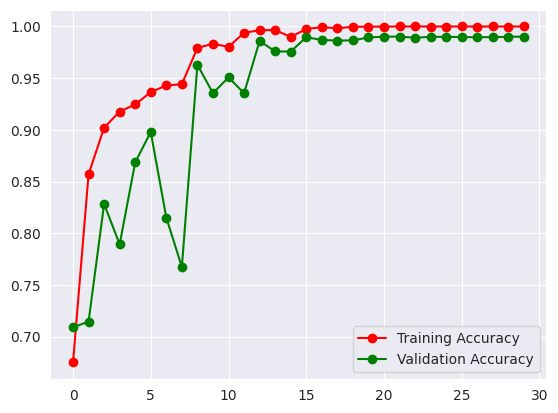

In [33]:
# Plot training and validation accuracy
plt.plot(history.history["accuracy"], 'ro-', label="Training Accuracy")  # Training accuracy plot
plt.plot(history.history["val_accuracy"], 'go-', label="Validation Accuracy")  # Validation accuracy plot
plt.legend()  
plt.show()  # Display the plot


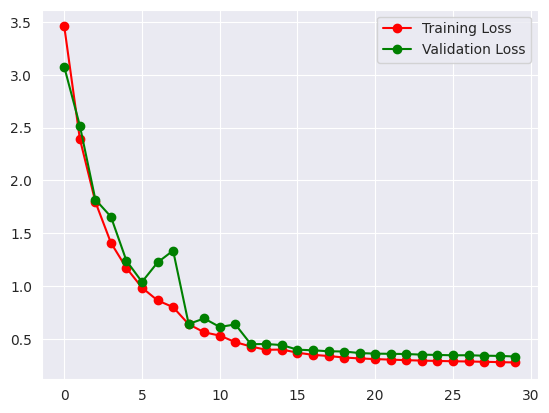

In [34]:
#plot Training and Validation loss like above accuracy
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Validation Loss")
plt.legend()
plt.show()

# Evaluate the model

In [23]:
#Evaluate the model to check the test accuaracy
model.evaluate(X_test , y_test)

147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9850 - loss: 0.3530


[0.3382786810398102, 0.9880698919296265]

# Classification Report on Test Data

In [38]:
# Define the class names and their short names
class_names = {
    0: 'Actinic Keratoses',  # akiec
    1: 'Basal Cell Carcinoma',  # bcc
    2: 'Benign Keratosis-like Lesions',  # bkl
    3: 'Dermatofibroma',  # df
    4: 'Melanocytic Nevi',  # nv
    5: 'Melanoma',  # mel
    6: 'Vascular Lesions'  # vasc
}

# Short names for confusion matrix
short_names = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'mel', 'vasc']


# Evaluate the model on the validation set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(short_names)))

# Show the class names with their indices
print("\nFull Class Names with Short name:")
for index, name in class_names.items():
    print(f"       {short_names[index]}: {name}")


147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report:

              precision    recall  f1-score   support



       akiec       1.00      1.00      1.00       666

         bcc       0.99      1.00      1.00       675

         bkl       0.97      1.00      0.99       668

          df       1.00      1.00      1.00       669

          nv       1.00      0.92      0.96       652

         mel       1.00      1.00      1.00       667

        vasc       0.96      1.00      0.98       697



    accuracy                           0.99      4694

   macro avg       0.99      0.99      0.99      4694

weighted avg       0.99      0.99      0.99      4694





Full Class Names with Short name:

       akiec: Actinic Keratoses

       bcc: Basal Cell Carcinoma

       bkl: Benign Keratosis-like Lesions

       df: Dermatofibroma

       nv: Melanocytic Nevi

       mel: Melanoma

       vasc: Vascular Lesions


# Confusiion Matrix on Test Data

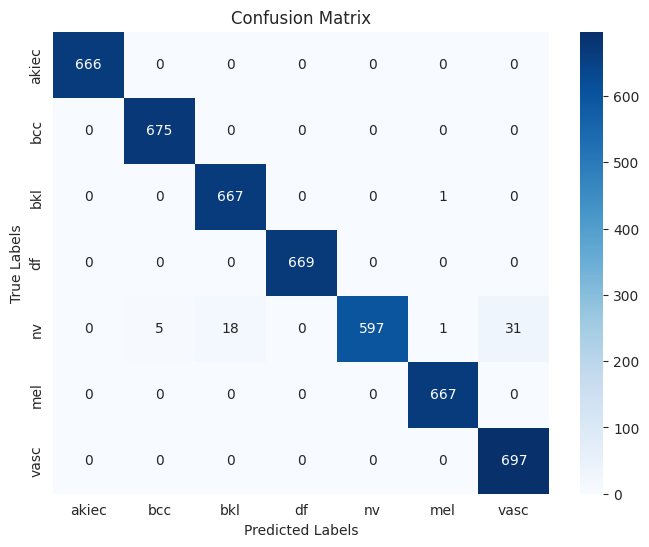

In [27]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix with short names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=short_names, yticklabels=short_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Inference

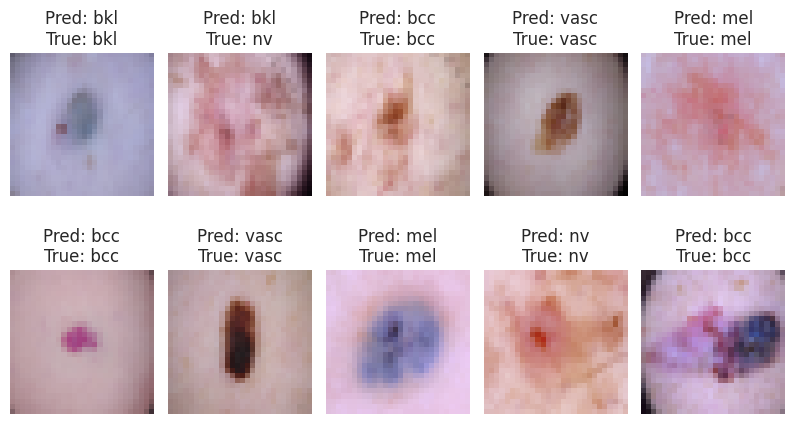

In [28]:
# Assuming correct is a list of indices where the model correctly classified the images
correct = [12,1,2,13,55,5,16,78,8,11]

plt.figure(figsize=(10, 5))
for i, c in enumerate(correct[:10]):  # Loop through the first 10 correct indices
    plt.subplot(2, 5, i + 1)  # Arrange the plots in a 2x5 grid
    plt.imshow(X_val[c])
    plt.title(f"Pred: {short_names[y_pred_classes[c]]}\nTrue: {short_names[y_true[c]]}")
    plt.axis('off')

# Adjust the space between rows and columns
plt.subplots_adjust(wspace=0.1, hspace=0.3)  # Reduce hspace to reduce vertical space between rows

plt.show()


In [29]:
# Assuming correct is a list of correctly classified examples
for c in correct[:10]:
    print(f"Index: {c}, Predicted: {y_pred_classes[c]}, True: {y_true[c]}")


Index: 12, Predicted: 2, True: 2

Index: 1, Predicted: 2, True: 4

Index: 2, Predicted: 1, True: 1

Index: 13, Predicted: 6, True: 6

Index: 55, Predicted: 5, True: 5

Index: 5, Predicted: 1, True: 1

Index: 16, Predicted: 6, True: 6

Index: 78, Predicted: 5, True: 5

Index: 8, Predicted: 4, True: 4

Index: 11, Predicted: 1, True: 1


# Layer Connections

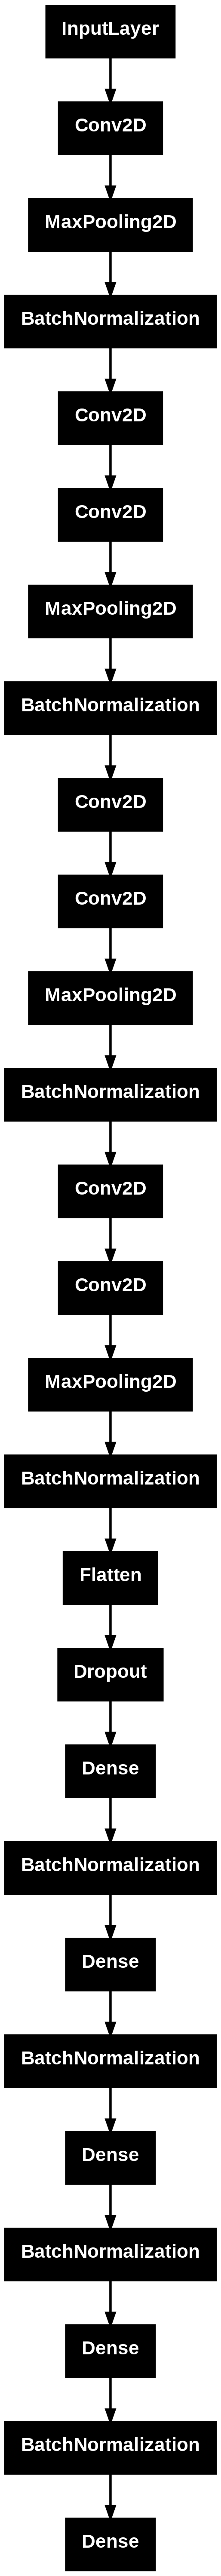

In [32]:
keras.utils.plot_model(model)